<a href="https://colab.research.google.com/github/sir-sauc3/cap-comp215/blob/main/examples/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes and Objects
This is our week 3 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [1]:
import math
import random
import matplotlib.pyplot as plt
from dataclasses import dataclass
from pprint import pprint

# Everything in Python is an object and everything has a "type" which is its class


# Even a function is an object...
def sqr(a):
  return a*a

type(sqr)
# ... so we can even define additional "attributes" for that object:
sqr.skill = "Exploring"
sqr.skill


'Exploring'

## Problem: Collision detection using circles

In [2]:
@dataclass
class Point2D:
  """ Representation for a Point in 2D space """
  x: float
  y: float

  def __eq__(self, other):
    """ Return True iff the 2 points are at the same coordinate """
    return self.x==other.x and self.y==other.y

  def __add__(self, other):
    """ Return the point representing the sum of this point and the other """
    return Point2D(self.x+other.x, self.y+other.y)

  def distance(self, other):
      """ Return the distance between this point and the other one """
      return math.sqrt(
          (self.x-other.x)**2 +
          (self.y-other.y)**2
      )

p1 = Point2D(4, 9)
p2 = Point2D(4, 9)
p1.distance(p2)
p1+p2
p1==p2


True

In [3]:
@dataclass
class Circle:
  """ Representation for the data and operations on a circle """
  radius: float
  centre: Point2D

  @property
  def x(self):
    return self.centre.x

  @property
  def y(self):
    return self.centre.y

  def area(self):
      """ Return the area of this circle """
      return math.pi * self.radius**2
      
  def move(self, offset):
      """ Move this circle by given Point2D offset """
      self.centre = self.centre + offset

  def distance(self, other):
      """ Return the distance between this circle centre and the other one """
      return math.sqrt(
          (self.x-other.x)**2 +
          (self.y-other.y)**2
      )

  def intersects(self, other):
      """ Return True iff this circle intersects the other one """
      return self.radius + other.radius >= self.distance(other)

c = Circle(10, Point2D(5, 9))
c.x, c.y, c.radius, c.centre
c.move(Point2D(2, 3))
first = Circle(8, Point2D(30,40))
second = Circle(11, Point2D(6,8))
first.distance(second)
first.intersects(second)

False

In [15]:
# Test Circle class
origin = Point2D(0,0)
d = Circle(3, Point2D(3,4))
d.distance(origin)

5.0

## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


[]

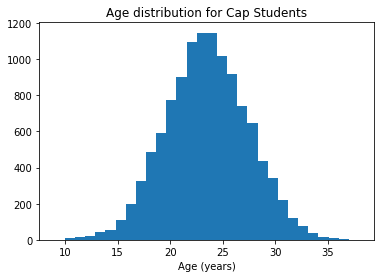

In [5]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# Set the number of bins to the number of ages we found
n_bins = len(set(data))

fig, ax = plt.subplots()
ax.set_title("Age distribution for Cap Students")
ax.set_xlabel('Age (years)')

# plot a histogram of the data, divided into n "equal width" bins
ax.hist(data, bins=n_bins)
plt.plot()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [6]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

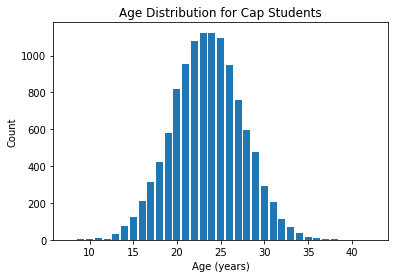

In [7]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()